0    9900
1     100
dtype: int64


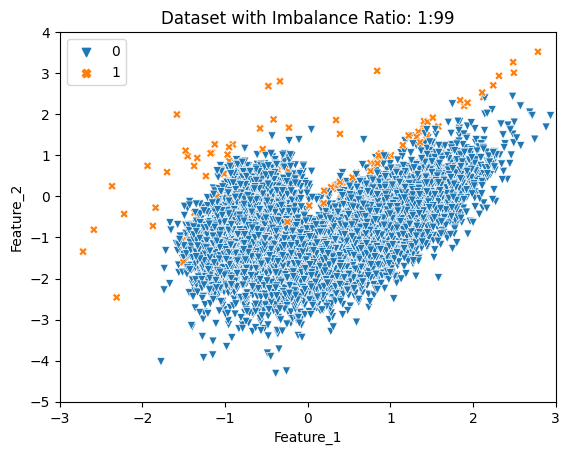

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()
    
    
    
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

###  TomekLinks :

`TomekLinks` is a technique in machine learning used for handling imbalanced datasets. Specifically, it identifies pairs of instances—one from the majority class and one from the minority class—that are close to each other but differ in their class labels. These pairs, known as Tomek links, represent potentially ambiguous or noisy instances, and `TomekLinks` removes the majority class instance from each pair. By eliminating these borderline examples, the method aims to enhance the separation between classes, improving the quality of the training dataset and the performance of machine learning models on imbalanced classification tasks.

Resampled dataset shape Counter({0: 9875, 1: 100})
0    9875
1     100
dtype: int64


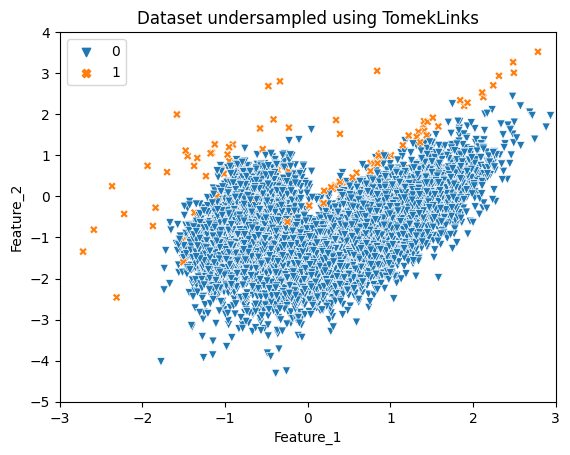

In [2]:
from imblearn.under_sampling import TomekLinks

tklinks = TomekLinks(sampling_strategy="auto")
X_res, y_res = tklinks.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using TomekLinks")